In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline
from PIL import Image 


In [2]:
cd /Users/austinmcdonald/Desktop/smfi/single2

/Users/austinmcdonald/Desktop/smfi/single2


In [3]:
os.listdir()

['Image0_1.tif',
 'Image0_10.tif',
 'Image0_100.tif',
 'Image0_1000.tif',
 'Image0_1001.tif',
 'Image0_1002.tif',
 'Image0_1003.tif',
 'Image0_1004.tif',
 'Image0_1005.tif',
 'Image0_1006.tif',
 'Image0_1007.tif',
 'Image0_1008.tif',
 'Image0_1009.tif',
 'Image0_101.tif',
 'Image0_1010.tif',
 'Image0_1011.tif',
 'Image0_1012.tif',
 'Image0_1013.tif',
 'Image0_1014.tif',
 'Image0_1015.tif',
 'Image0_1016.tif',
 'Image0_1017.tif',
 'Image0_1018.tif',
 'Image0_1019.tif',
 'Image0_102.tif',
 'Image0_1020.tif',
 'Image0_1021.tif',
 'Image0_1022.tif',
 'Image0_1023.tif',
 'Image0_1024.tif',
 'Image0_1025.tif',
 'Image0_1026.tif',
 'Image0_1027.tif',
 'Image0_1028.tif',
 'Image0_1029.tif',
 'Image0_103.tif',
 'Image0_1030.tif',
 'Image0_1031.tif',
 'Image0_1032.tif',
 'Image0_1033.tif',
 'Image0_1034.tif',
 'Image0_1035.tif',
 'Image0_1036.tif',
 'Image0_1037.tif',
 'Image0_1038.tif',
 'Image0_1039.tif',
 'Image0_104.tif',
 'Image0_1040.tif',
 'Image0_1041.tif',
 'Image0_1042.tif',
 'Image0_1

In [4]:
imI = Image.open('Image0_1.tif')
imF = Image.open('Image0_3400.tif')
#im.show()

In [5]:
ImdatI = np.array(imI)
ImdatF = np.array(imF)


In [6]:
ImdatI.shape

(512, 512)

In [7]:
Row = 10
Col = 10
Xindex = 260 
Yindex = 286
ImageI = ImdatI[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
ImageF = ImdatF[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]

In [ ]:
max(ImageF[19])

In [ ]:
Image[19]

In [ ]:
testx=np.arange(0,41)

In [ ]:
plt.scatter(testx,Image[19])
plt.plot(testx,Image[19])

plt.show()

In [ ]:
np.argmax(Image[19])

In [ ]:
ImageIntensity= Image[19][19:41]
Pixel = (np.arange(19,41)-19)*16e-6

In [ ]:
ImageIntensity

In [ ]:
Pixel

In [ ]:
Depth = np.sqrt((220e-9)**2-(Pixel)**2)

In [ ]:
Depth

In [ ]:
plt.plot(Pixel*1e6,ImageIntensity)

In [8]:
minnI=[]
minnF=[]
for x in range(0,21):
    minnI.append(min(ImdatI[x]))
    minnF.append(min(ImdatF[x]))
print('min I',min(minnI) )
print('min F',min(minnF) )


min I 1856
min F 1858


In [ ]:
ImageI.shape

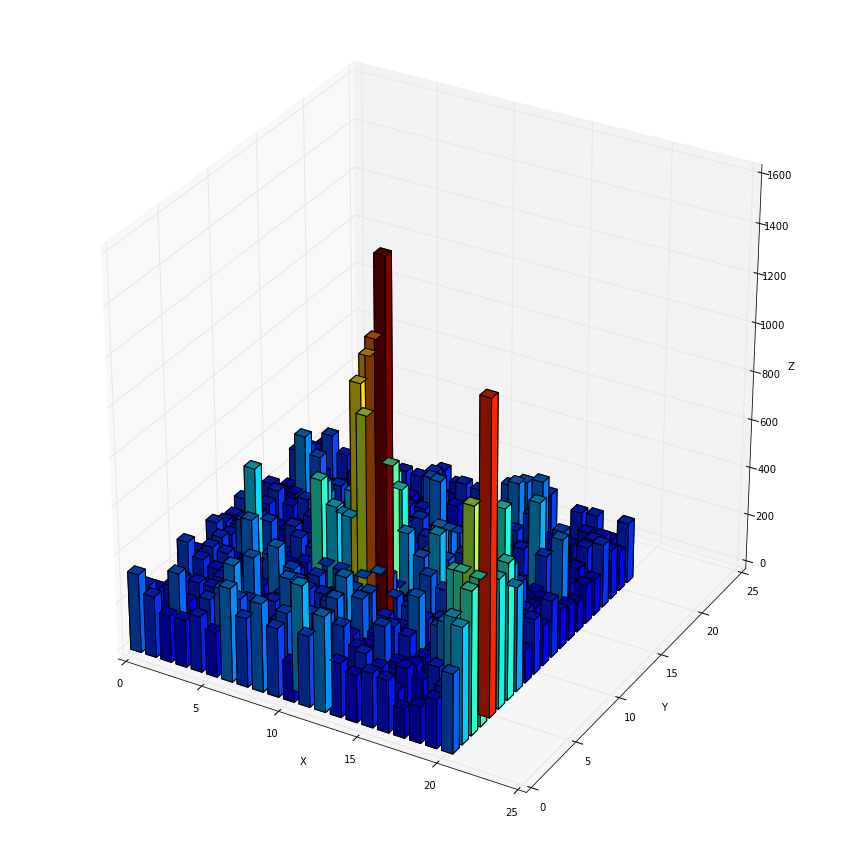

In [9]:
from mpl_toolkits.mplot3d import Axes3D

data = ImageI-1856


ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()   
ypos = ypos.flatten()
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(data.max()))
ax.bar3d(xpos,ypos,zpos, .7,.7,data.flatten(), color=colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.savefig('/Users/austinmcdonald/Desktop/CCD/CCD-image.pdf')

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

data = ImageF-1856


ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()   
ypos = ypos.flatten()
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(data.max()))
ax.bar3d(xpos,ypos,zpos, .7,.7,data.flatten(), color=colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.savefig('/Users/austinmcdonald/Desktop/CCD/CCD-image.pdf')

plt.show()

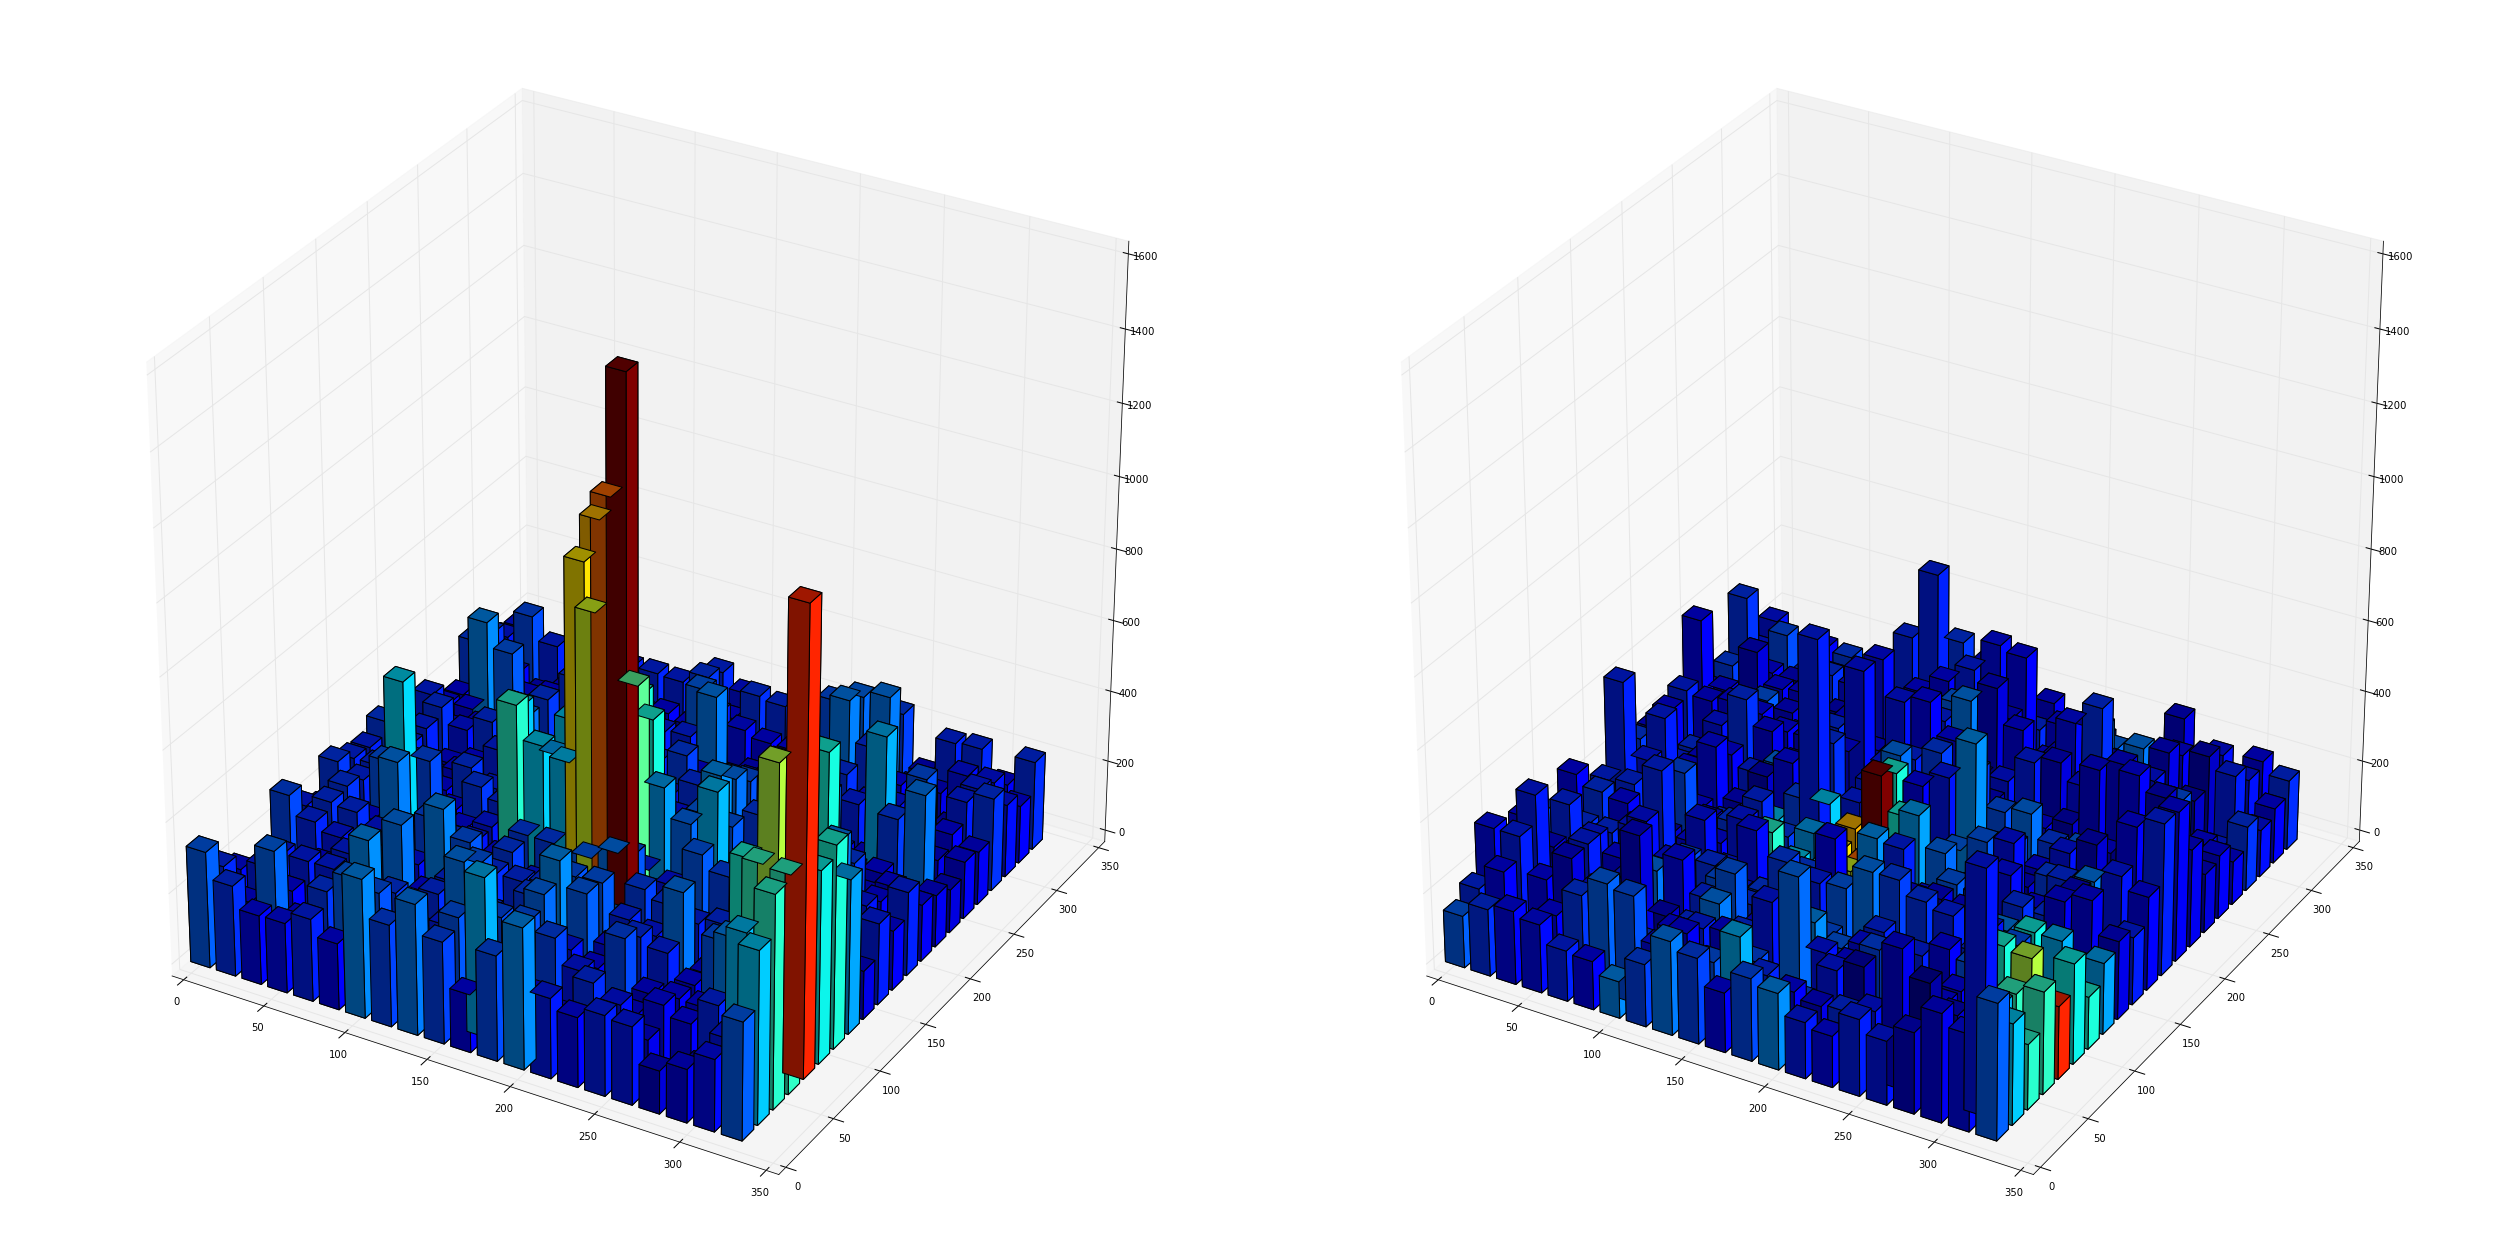

In [16]:
from mpl_toolkits.mplot3d import Axes3D

data = ImageI-1856
data2 = ImageF-1856


ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()*16  
ypos = ypos.flatten()*16
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(35,35))
ax = fig.add_subplot(221, projection='3d')

colors = plt.cm.jet(data.flatten()/float(data.max()))
ax.bar3d(xpos,ypos,zpos, 12,12,data.flatten(), color=colors)

ax2 = fig.add_subplot(222, projection='3d',sharez=ax,sharey=ax)
###ax2.title.set_text('')
ax2.bar3d(xpos,ypos,zpos, 12,12,data2.flatten(), color=colors)
ax.set_zlim(0, 1600)

plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/smfi/single2-site1.pdf')

plt.show()